In [86]:
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [87]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

from sklearn.tree import export_graphviz

from sklearn.feature_selection import SelectFromModel

In [88]:
from treeinterpreter import treeinterpreter as ti

In [89]:
from fastai import *
import graphviz
import re

In [90]:
df_train_labels_original = pd.read_csv('train_labels.csv',low_memory=False,index_col='building_id')
df_train_values_original = pd.read_csv('train_values.csv',low_memory=False, index_col='building_id', dtype= {
'geo_level_1_id':'uint8', 'geo_level_2_id':'uint16', 'geo_level_3_id':'uint16', 'count_floors_pre_eq':'uint8','age':'uint16', 'area_percentage':'uint16', 'height_percentage':'uint16', 
'land_surface_condition':'category', 'foundation_type':'category', 'roof_type':'category', 'ground_floor_type':'category', 'other_floor_type':'category', 'position':'category','plan_configuration':'category', 
'has_superstructure_adobe_mud':'bool', 'has_superstructure_mud_mortar_stone':'bool','has_superstructure_stone_flag':'bool', 'has_superstructure_cement_mortar_stone':'bool', 'has_superstructure_mud_mortar_brick':'bool', 'has_superstructure_cement_mortar_brick':'bool', 'has_superstructure_timber':'bool', 'has_superstructure_bamboo':'bool', 'has_superstructure_rc_non_engineered':'bool', 'has_superstructure_rc_engineered':'bool', 'has_superstructure_other':'bool', 
'legal_ownership_status':'category', 'count_families':'uint16', 
'has_secondary_use':'bool', 'has_secondary_use_agriculture':'bool', 'has_secondary_use_hotel':'bool', 'has_secondary_use_rental':'bool', 'has_secondary_use_institution':'bool', 'has_secondary_use_school':'bool', 'has_secondary_use_industry':'bool', 'has_secondary_use_health_post':'bool', 'has_secondary_use_gov_office':'bool', 'has_secondary_use_use_police':'bool', 'has_secondary_use_other':'bool',})
df_test_values_original = pd.read_csv('test_values.csv',low_memory=False, index_col='building_id', dtype= {
'geo_level_1_id':'uint8', 'geo_level_2_id':'uint16', 'geo_level_3_id':'uint16', 'count_floors_pre_eq':'uint8','age':'uint16', 'area_percentage':'uint16', 'height_percentage':'uint16', 
'land_surface_condition':'category', 'foundation_type':'category', 'roof_type':'category', 'ground_floor_type':'category', 'other_floor_type':'category', 'position':'category','plan_configuration':'category', 
'has_superstructure_adobe_mud':'bool', 'has_superstructure_mud_mortar_stone':'bool','has_superstructure_stone_flag':'bool', 'has_superstructure_cement_mortar_stone':'bool', 'has_superstructure_mud_mortar_brick':'bool', 'has_superstructure_cement_mortar_brick':'bool', 'has_superstructure_timber':'bool', 'has_superstructure_bamboo':'bool', 'has_superstructure_rc_non_engineered':'bool', 'has_superstructure_rc_engineered':'bool', 'has_superstructure_other':'bool', 
'legal_ownership_status':'category', 'count_families':'uint16', 
'has_secondary_use':'bool', 'has_secondary_use_agriculture':'bool', 'has_secondary_use_hotel':'bool', 'has_secondary_use_rental':'bool', 'has_secondary_use_institution':'bool', 'has_secondary_use_school':'bool', 'has_secondary_use_industry':'bool', 'has_secondary_use_health_post':'bool', 'has_secondary_use_gov_office':'bool', 'has_secondary_use_use_police':'bool', 'has_secondary_use_other':'bool',})

In [91]:
train_values_subset = pd.get_dummies(df_train_values_original)
train_labels_subset = df_train_labels_original['damage_grade']

validation_size = df_train_values_original.index.size - df_test_values_original.index.size

In [92]:
train_values, validation_values = (train_values_subset.iloc[0:173733], train_values_subset.iloc[173733:-1])
train_labels, validation_labels = (train_labels_subset.iloc[0:173733], train_labels_subset.iloc[173733:-1])

In [61]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(train_values, train_labels)

SelectFromModel(estimator=RandomForestClassifier())

In [62]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [63]:
selected_feat= train_values.columns[(sel.get_support())]
selected_feat

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'count_families', 'foundation_type_r'],
      dtype='object')

In [64]:
rndfor = RandomForestClassifier(n_jobs=-1)

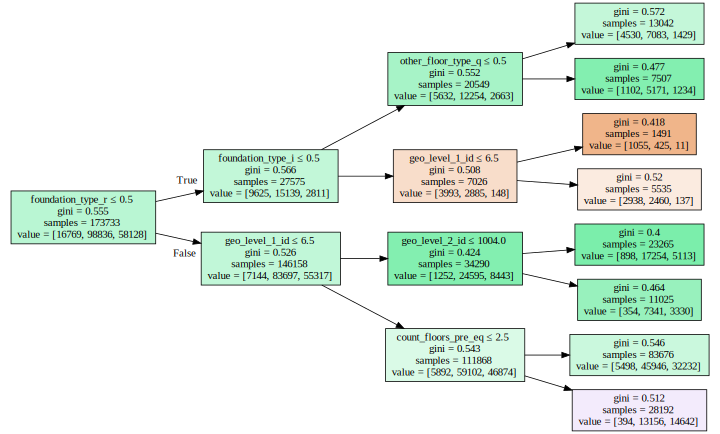

In [84]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=25, max_features=0.5, 
                        max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(train_values, train_labels)

draw_tree(m.estimators_[0], train_values, precision=3)

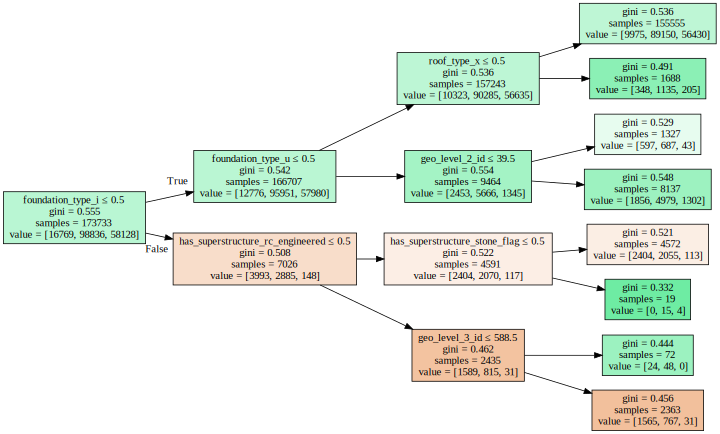

In [81]:
m = RandomForestClassifier(n_estimators=1, max_depth=3, 
                          bootstrap=False, n_jobs=-1)
m.fit(train_values, train_labels)

draw_tree(m.estimators_[0], train_values, precision=3)